## **05. 전처리 및 탐색적 데이터 분석**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker
from matplotlib_venn import venn2
from matplotlib.lines import Line2D
from pandas import json_normalize
from pywaffle import Waffle
import seaborn as sns
import ast
import re
import pprint
import warnings
warnings.filterwarnings("ignore")

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### **테이블 정리**

<p align="center">
  <img src="ER.jpg" align="center" width="40%">
  <img src="er_2.jpg" align="center" width="40%">
  <figcaption align="center"></figcaption>
</p>

#### **JOURNALIST 테이블**

**헤드라인 뉴스**

In [2]:
headline_journalist = pd.read_csv('headline_journalist.csv')

columns = ['names', 'subscriber_numbers', 'cheer_numbers']
for column in columns:
    headline_journalist.loc[:, column] = headline_journalist[column].apply(ast.literal_eval)
    
headline_journalist.head(3)

,headline_link,names,subscriber_numbers,cheer_numbers
0,https://n.news.naver.com/article/newspaper/032...,[],[],[]
1,https://n.news.naver.com/article/newspaper/032...,[김송이],[992],[533]
2,https://n.news.naver.com/article/newspaper/020...,"[김도형, 이승우, 최미송, ]","[1670, 917, 1434, ]","[2067, 1309, 537, ]"


In [3]:
each_journalist = []

for row in range(headline_journalist.shape[0]):
    press_id = headline_journalist['headline_link'].iloc[row].split('/')[5]

    for each in range(len(headline_journalist.iloc[row]['names'])):
        journalist_data = [
            press_id,
            headline_journalist.iloc[row]['names'][each],
            headline_journalist.iloc[row]['subscriber_numbers'][each],
            headline_journalist.iloc[row]['cheer_numbers'][each]
        ]
        each_journalist.append(journalist_data)

underway_1 = pd.DataFrame(each_journalist, columns=['press_id', 'name', 'subscriber_numbers', 'cheer_numbers']).drop_duplicates()
underway_1 = underway_1[underway_1['name'] != ' ']
underway_1 = underway_1.groupby(['press_id', 'name']).agg({'subscriber_numbers': 'max',
                                                           'cheer_numbers': 'max'}).reset_index()
underway_1.head(3)

,press_id,name,subscriber_numbers,cheer_numbers
0,020,,,
1,020,곽도영,1131,1253
2,020,김기윤,1602,1012


In [4]:
headline_sector_journalist = pd.read_csv('headline_sector_journalist.csv')
headline_sector_journalist.loc[:, 'byline'] = headline_sector_journalist['byline'].apply(ast.literal_eval)

journalist_mail = []

for row in range(headline_sector_journalist.shape[0]):
    press_id = headline_sector_journalist['headline_link'].iloc[row].split('/')[5]

    for each in range(len(headline_sector_journalist.iloc[row]['byline'])):
        if press_id != '028':
            journalist_data = [
                press_id,
                headline_sector_journalist.iloc[row]['byline'][each]
            ]
            journalist_mail.append(journalist_data)
        else: 
            hani = headline_sector_journalist.iloc[row]['byline'][each].split(',')
            for hani_each in hani:
                journalist_mail.append([press_id, hani_each])

underway_2 = []

for info in journalist_mail:
    info[1] = re.sub(r'^.*?=[ ]?|\(|\)|^\s*', '', info[1])
    parts = info[1].split()
    if len(parts) >= 2:
        press_id = info[0] 
        name = parts[0]
        email_match = re.search(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', info[1])
        if email_match:
            email = email_match.group()
            underway_2.append([press_id, name, email])

underway_2 = pd.DataFrame(underway_2, columns=['press_id', 'name', 'email']).drop_duplicates()
underway_2.head(3)

,press_id,name,email
0,032,유정인,jeongin@kyunghyang.com
1,032,김송이,songyi@kyunghyang.com
2,020,김도형,dodo@donga.com


In [5]:
journalist_1 = underway_2.merge(underway_1, on=['press_id', 'name'], how='left')
journalist_1[journalist_1.duplicated(subset=['email'], keep=False)]

,press_id,name,email,subscriber_numbers,cheer_numbers


In [6]:
journalist_1[journalist_1.duplicated(subset=['name'], keep=False)]

,press_id,name,email,subscriber_numbers,cheer_numbers
29,469,이윤주,misslee@hankookilbo.com,1924,383
55,469,김지현,hyun1620@hankookilbo.com,2700,2161
103,032,이윤주,runyj@kyunghyang.com,NaN,NaN
114,020,김지현,jhk85@donga.com,2033,2443


**랭킹뉴스**

In [7]:
ranking_journalist = pd.read_csv('rankingnews_journalist.csv')

columns = ['names', 'subscriber_numbers', 'cheer_numbers']
for column in columns:
    ranking_journalist.loc[:, column] = ranking_journalist[column].apply(ast.literal_eval)
    
ranking_journalist.head(3)

,rankingnews_link,names,subscriber_numbers,cheer_numbers
0,https://n.news.naver.com/article/032/000322062...,[류인하],[3438],[1785]
1,https://n.news.naver.com/article/032/000322073...,[문광호],[4853],[1588]
2,https://n.news.naver.com/article/032/000322080...,[김현수],[805],[388]


In [8]:
each_journalist = []

for row in range(ranking_journalist.shape[0]):
    press_id = ranking_journalist['rankingnews_link'].iloc[row].split('/')[4]

    for each in range(len(ranking_journalist.iloc[row]['names'])):
        journalist_data = [
            press_id,
            ranking_journalist.iloc[row]['names'][each],
            ranking_journalist.iloc[row]['subscriber_numbers'][each],
            ranking_journalist.iloc[row]['cheer_numbers'][each]
        ]
        each_journalist.append(journalist_data)
        
underway_3 = pd.DataFrame(each_journalist, columns=['press_id', 'name', 'subscriber_numbers', 'cheer_numbers']).drop_duplicates()
underway_3 = underway_3[underway_3['name'] != ' ']
underway_3 = underway_3.groupby(['press_id', 'name']).agg({'subscriber_numbers': 'max',
                                                           'cheer_numbers': 'max'}).reset_index()
underway_3.head(3)

,press_id,name,subscriber_numbers,cheer_numbers
0,020,,,
1,020,김도형,1670,2067
2,020,김소영,1521,1563


In [9]:
ranking_sector_journalist = pd.read_csv('ranking_sector_journalist.csv')
ranking_sector_journalist.loc[:, 'byline'] = ranking_sector_journalist['byline'].apply(ast.literal_eval)

journalist_mail = []

for row in range(ranking_sector_journalist.shape[0]):
    press_id = ranking_sector_journalist['rankingnews_link'].iloc[row].split('/')[4]

    for each in range(len(ranking_sector_journalist.iloc[row]['byline'])):
        if press_id != '028':
            journalist_data = [press_id,
                               ranking_sector_journalist.iloc[row]['byline'][each]]
            journalist_mail.append(journalist_data)
        else: 
            hani = ranking_sector_journalist.iloc[row]['byline'][each].split(',')
            for hani_each in hani:
                journalist_mail.append([press_id, hani_each])

underway_4 = []

for info in journalist_mail:
    info[1] = re.sub(r'^.*?=[ ]?|\(|\)|^\s*|기자', '', info[1])
    parts = info[1].split()
    if len(parts) >= 2:
        press_id = info[0] 
        name = parts[0]
        email_match = re.search(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', info[1])
        if email_match:
            email = email_match.group()
            underway_4.append([press_id, name, email])

underway_4 = pd.DataFrame(underway_4, columns=['press_id', 'name', 'email']).drop_duplicates()
underway_4.head(3)

,press_id,name,email
0,032,류인하,acha@kyunghyang.com
1,032,문광호,moonlit@kyunghyang.com
2,032,김현수,khs@kyunghyang.com


In [10]:
journalist_2 = underway_4.merge(underway_3, on=['press_id', 'name'], how='left')
journalist = pd.concat([journalist_1, journalist_2], axis=0)
journalist = journalist.drop_duplicates()
journalist = journalist.rename(columns={'subscriber_numbers': 'subscribers', 'cheer_numbers': 'cheers'})
journalist.to_csv("journalist.csv", index=False)

#### **NEWS 테이블**

In [11]:
news_1 = pd.read_csv("headline_eval.csv")
news_2 = pd.read_csv("headline_sector_journalist.csv")
news = pd.read_csv("headline_ranking_news.csv")
news_3 = news[['day', 'headline', 'headline_link']]
news_3 = news_3.dropna()

headline_news = news_3.merge(news_2, how='left', on='headline_link').merge(news_1, how='left', on='headline_link')
headline_news = headline_news[headline_news['useful'].notna()] # 한 행은 '스포츠'면으로 다른 페이지로 이동하여 크롤링되지 않음
headline_news['press_id'] = headline_news['headline_link'].apply(lambda x: x.split('/')[5])
headline_news['article_id'] = headline_news['headline_link'].apply(lambda x: x.split('/')[6].split('?')[0])

In [12]:
email_addresses = []

for byline in headline_news['byline']:
    email = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', byline)
    if email:
        email_addresses.append(email)
    else:
        email_addresses.append(None)

headline_news['email'] = email_addresses

headline_news.drop(columns=['headline_link','byline'], axis=1, inplace=True)
recommend_columns = ['useful', 'wow', 'touched', 'analytical', 'recommend']
headline_news[recommend_columns] = headline_news[recommend_columns].astype("int")
headline_news['type'] = 'headline'
headline_news['ranking'] = np.nan
headline_news = headline_news.rename(columns={'headline': 'title', 'day': 'date'})
headline_news.tail(3)

,date,title,category,useful,wow,touched,analytical,recommend,press_id,article_id,email,type,ranking
178,20230512,"3년 넘게, 고생하셨습니다…정부 “코로나 비상사태 끝”",['사회'],0,0,3,0,0,032,0003223009,[sokhm@kyunghyang.com],headline,NaN
179,20230512,4년 만에 구제역 비상 …다시 ‘살처분’ 비명,['경제'],0,0,0,0,2,032,0003223008,"[c0c0@kyunghyang.com, hjlee@kyunghyang.com]",headline,NaN
180,20230512,"구글 챗봇 ‘바드’, 한국어 탑재하고 오픈",['경제'],0,0,0,0,0,032,0003223021,[duk@kyunghyang.com],headline,NaN


**랭킹뉴스**

In [13]:
news_4 = pd.read_csv("rankingnews_eval.csv")
news_5 = pd.read_csv("ranking_sector_journalist.csv")
news_6 = news[['day', 'ranking', 'rankingnews', 'rankingnews_link']]
news_6.dropna()
duplicated = news_6[news_6.duplicated(subset='rankingnews_link', keep=False)]
duplicated

,day,ranking,rankingnews,rankingnews_link
2,20230501,3,"홍준표, 대구도축장 폐쇄에…경북 양돈농가 “대안도 없이, 다 죽으란 얘기냐”[현장에서]",https://n.news.naver.com/article/032/000322080...
30,20230502,1,"""아빠와 여러 일 있었지만"" 서세원과 절연했던 딸 서동주가 지킨 마지막 길",https://n.news.naver.com/article/469/000073723...
36,20230502,2,"홍준표, 대구도축장 폐쇄에…경북 양돈농가 “대안도 없이, 다 죽으란 얘기냐”[현장에서]",https://n.news.naver.com/article/032/000322080...
50,20230503,1,"‘1억짜리 바나나’ 먹은 서울대생...작가는 괜찮다는데 네티즌 싸늘, 왜?",https://n.news.naver.com/article/023/000376152...
55,20230503,1,“어이없다” 부인하더니 황제수영 사실로…고개 숙인 파주시장,https://n.news.naver.com/article/469/000073742...
57,20230503,3,"""아빠와 여러 일 있었지만"" 서세원과 절연했던 딸 서동주가 지킨 마지막 길",https://n.news.naver.com/article/469/000073723...
64,20230503,5,“인천대공원 대신 ‘키카’”···어린이날 비소식에 시민들 ‘울상’,https://n.news.naver.com/article/032/000322133...
78,20230504,4,"‘1억짜리 바나나’ 먹은 서울대생...작가는 괜찮다는데 네티즌 싸늘, 왜?",https://n.news.naver.com/article/023/000376152...
80,20230504,1,스펀지 같은 1kg 초미숙아 가는 숨소리…아빠 올 때까지 살아 있으렴,https://n.news.naver.com/article/028/000263848...
90,20230504,1,“인천대공원 대신 ‘키카’”···어린이날 비소식에 시민들 ‘울상’,https://n.news.naver.com/article/032/000322133...


In [14]:
ranking_news = news_6.merge(news_4, how='left', on='rankingnews_link').merge(news_5, how='left', on='rankingnews_link')
ranking_news['press_id'] = ranking_news['rankingnews_link'].apply(lambda x: x.split('/')[4])
ranking_news['article_id'] = ranking_news['rankingnews_link'].apply(lambda x: x.split('/')[5].split('?')[0])

In [15]:
email_addresses = []

for byline in ranking_news['byline']:
    email = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', byline)
    if email:
        email_addresses.append(email)
    else:
        email_addresses.append(None)

ranking_news['email'] = email_addresses

ranking_news.drop(columns=['rankingnews_link','byline'], axis=1, inplace=True)
recommend_columns = ['useful', 'wow', 'touched', 'analytical', 'recommend', 'ranking']
ranking_news[recommend_columns] = ranking_news[recommend_columns].astype("int")
ranking_news['type'] = 'ranking'
ranking_news = ranking_news.rename(columns={'rankingnews': 'title', 'day': 'date'})
ranking_news.tail(3)

,date,ranking,title,useful,wow,touched,analytical,recommend,category,press_id,article_id,email,type
247,20230512,3,테라 권도형 몬테네그로에서 첫 재판···재산 묻자 “아파트 1채”,20,3,0,3,38,['세계'],032,0003223129,[bachwsik@kyunghyang.com],ranking
248,20230512,4,웃돈 주고 사던 ‘중고 전기차’…반년 만에 시세 ‘뚝’ 이유는,10,7,23,3,18,"['경제', '생활']",032,0003222941,[gabgu@kyunghyang.com],ranking
249,20230512,5,"음탕한 암사자, 폭압의 여왕 미어캣···다윈의 고정관념 부수는 ‘암컷들’[책과 삶]",38,81,136,7,26,"['IT', '생활']",032,0003223182,[5km@kyunghyang.com],ranking


In [16]:
news = pd.concat([headline_news, ranking_news], axis=0)
news.to_csv("news.csv", index=False)

<hr>

### **탐색적 데이터 분석**

In [17]:
news = pd.read_csv("news.csv", dtype={'press_id': str})

In [18]:
news['category'] = news['category'].apply(ast.literal_eval)
category = [category for categories in news['category'] for category in categories]
news_category = set(list(category))
news_category

{'IT', '경제', '사회', '생활', '세계', '오피니언', '정치'}

In [19]:
for category in news_category:
    column_name = f'{category}'
    news[column_name] = news['category'].apply(lambda x: 1 if category in x else 0)
    
news.drop(columns=['category'], axis=1, inplace=True)
news.rename(columns={'생활': '생활·문화', 'IT': 'IT·과학'}, inplace=True) # 네이버뉴스의 분류법에 따름

In [20]:
category_columns = ['정치', '경제', '사회', '생활·문화', 'IT·과학', '세계', '오피니언']
press = {"한겨레": "028", '경향신문': '032', '한국일보': '469', '동아일보': '020', '조선일보': '023'} 
news.groupby(['press_id', 'type'])[category_columns].sum()

정치  경제  사회  생활·문화  IT·과학  세계  오피니언
press_id type                                        
020      headline  13  16  13      4      1  16     0
         ranking   19   6  24      8      3   8     0
023      headline  17   3  13      2      2   2     0
         ranking    7   7  14      7      2  11     2
028      headline   9   3   7      0      0   4     0
         ranking   11   1  24      5      4   5     0
032      headline  10   6  16      1      0   2     0
         ranking   11  10  28      9      2   3     0
469      headline  12   7  11      2      0   5     2
         ranking    7   9  29      5      3   7     0

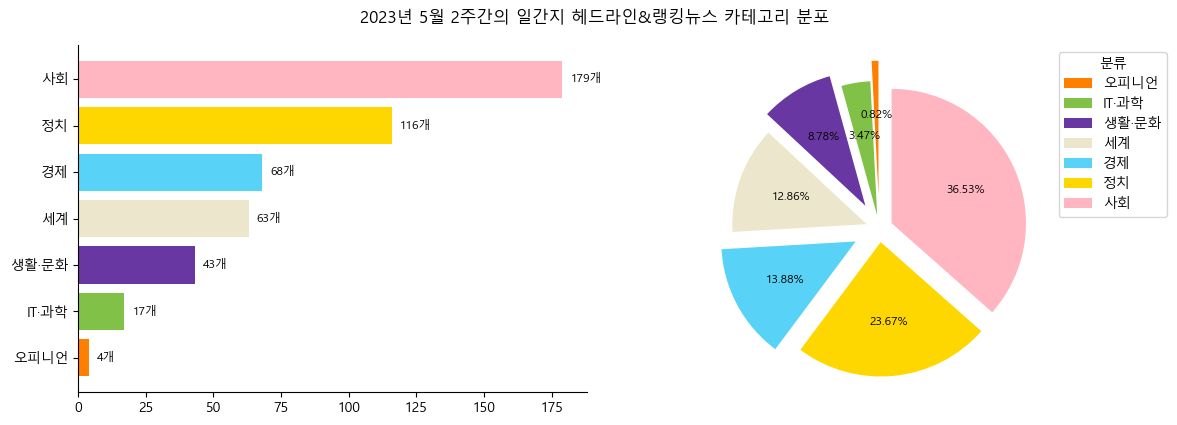

In [21]:
category_columns = ['정치', '경제', '사회', '생활·문화', 'IT·과학', '세계', '오피니언']
category_values = {column: news[column].sum() for column in category_columns}
category_df = pd.DataFrame(category_values.items(), columns= ['category', 'count'])
category_df = category_df.sort_values(by='count', ascending=True)

fig, axs = plt.subplots(1, 2, figsize=(12,4))
colors = ['#ff7f00', '#81C147', '#6937a1', '#ece6cc', '#58D3F7', '#FFD700','#FFB6C1']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

axs[0].barh('category', 'count', data=category_df, color=colors)
for i, v in enumerate(category_df['count']):
    axs[0].text(v+3, i, str(v)+'개', va='center', fontsize=8.5, color='black')
    
explode = [0.25, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1] 
axs[1].pie('count', data=category_df, colors=colors, startangle=90, autopct='%.2f%%', explode=explode,
           textprops={'fontsize': 8.5})
axs[1].axis('equal')
axs[1].legend(category_df['category'], title="분류", loc="upper left", bbox_to_anchor=(0.85, 1))


sns.despine()
plt.tight_layout()
plt.suptitle("2023년 5월 2주간의 일간지 헤드라인&랭킹뉴스 카테고리 분포", y=1.05)
plt.show()

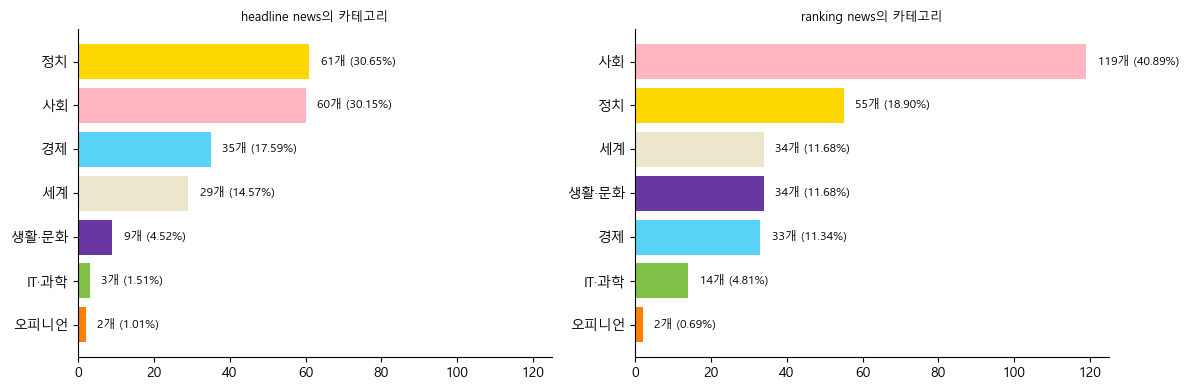

In [22]:
category_columns = ['정치', '경제', '사회', '생활·문화', 'IT·과학', '세계', '오피니언']
types = ['headline', 'ranking']

fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex=True)
for i, type in enumerate(types):
    category_values = {column: news[news['type'] == type][column].sum() for column in category_columns}
    category_df = pd.DataFrame(category_values.items(), columns= ['category', 'count'])
    category_df = category_df.sort_values(by='count', ascending=True)
    total_count = category_df['count'].sum()
    category_df['percent'] = (category_df['count'] / total_count) * 100

    colors = {'오피니언': '#ff7f00', 'IT·과학': '#81C147', '생활·문화': '#6937a1', '세계': '#ece6cc', '경제': '#58D3F7', '정치': '#FFD700', '사회': '#FFB6C1'}
    axs[i].barh('category', 'count', data=category_df, color=[colors[category] for category in category_df['category']])
    axs[i].set_title(f'{type} news의 카테고리', fontsize=9)
    for idx, cnt in enumerate(category_df['count']):
        axs[i].text(cnt+3, idx, f'{cnt}개 ({category_df.iloc[idx]["percent"]:.2f}%)', va='center', fontsize=8.5, color='black')        
    
sns.despine()
plt.tight_layout()
plt.show()    

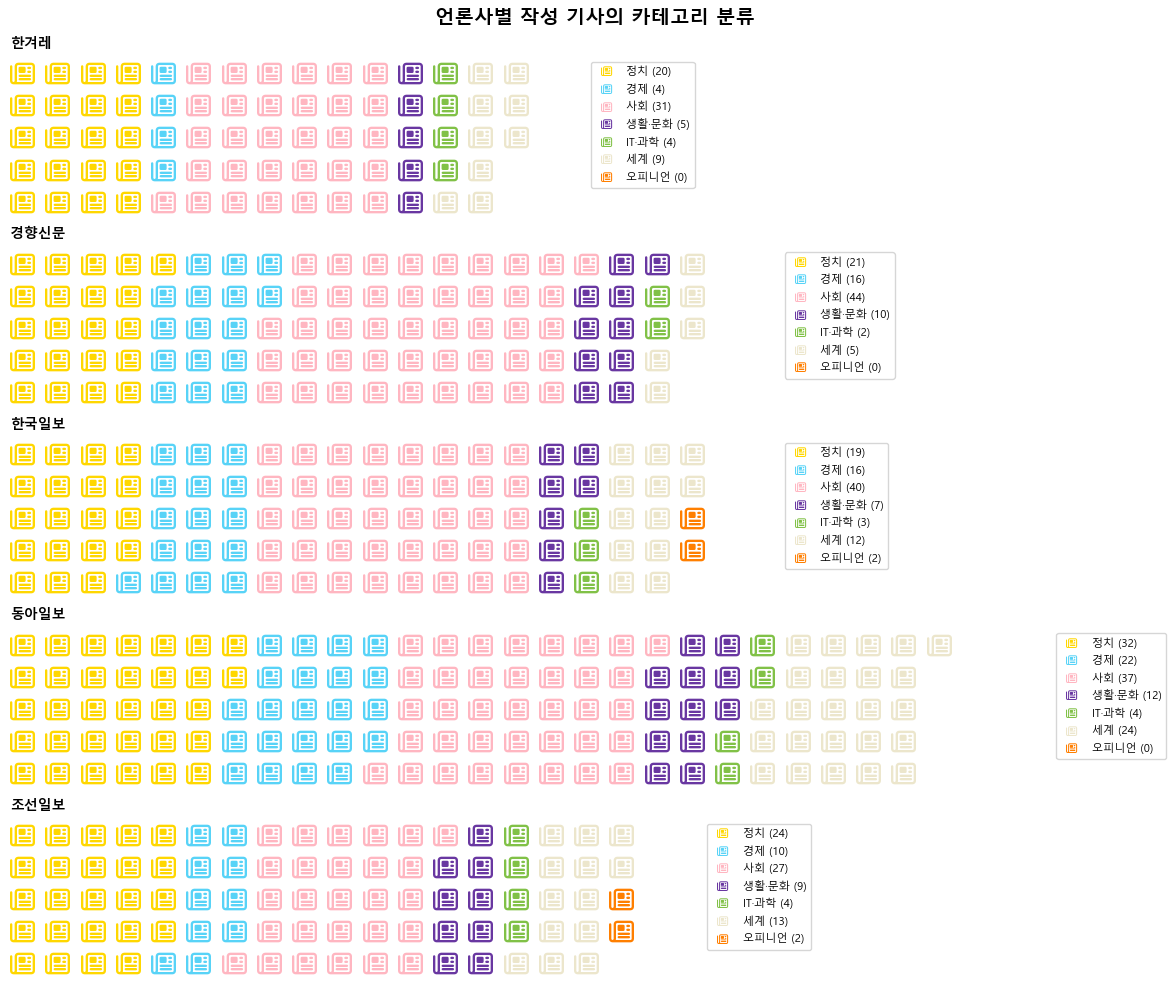

In [23]:
category_columns = ['정치', '경제', '사회', '생활·문화', 'IT·과학', '세계', '오피니언']
press = {"한겨레": "028", '경향신문': '032', '한국일보': '469', '동아일보': '020', '조선일보': '023'} 

colors = {'오피니언': '#ff7f00', 'IT·과학': '#81C147', '생활·문화': '#6937a1', '세계': '#ece6cc', '경제': '#58D3F7', '정치': '#FFD700', '사회': '#FFB6C1'}

plots_dict = {}
for i, (press_name, press_id) in enumerate(press.items(), start=1):
    data = news[news['press_id'] == press_id][category_columns].sum()
    plots_dict[510 + i] = {
        'values': data,
        'labels': [f"{category} ({value})" for category, value in data.items()],
        'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.1, 1), 'fontsize': 8},
        'title': {'label': press_name, 'loc': 'left', 'fontsize': 10, 'fontweight':'bold'},
        'colors': [colors[category] for category in category_columns],
        'icon_legend': True,
        'icon_style': 'regular'

    }

fig = plt.figure(
    FigureClass=Waffle,
    plots=plots_dict,
    rows=5,  
    cmap_name="Accent",  
    rounding_rule='ceil', 
    figsize=(12, 10),
    block_aspect_ratio=1.1,
    starting_location='NW',
    icons='newspaper',
)

fig.suptitle('언론사별 작성 기사의 카테고리 분류', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**언론사와 날짜별 랭킹뉴스 추천 수**

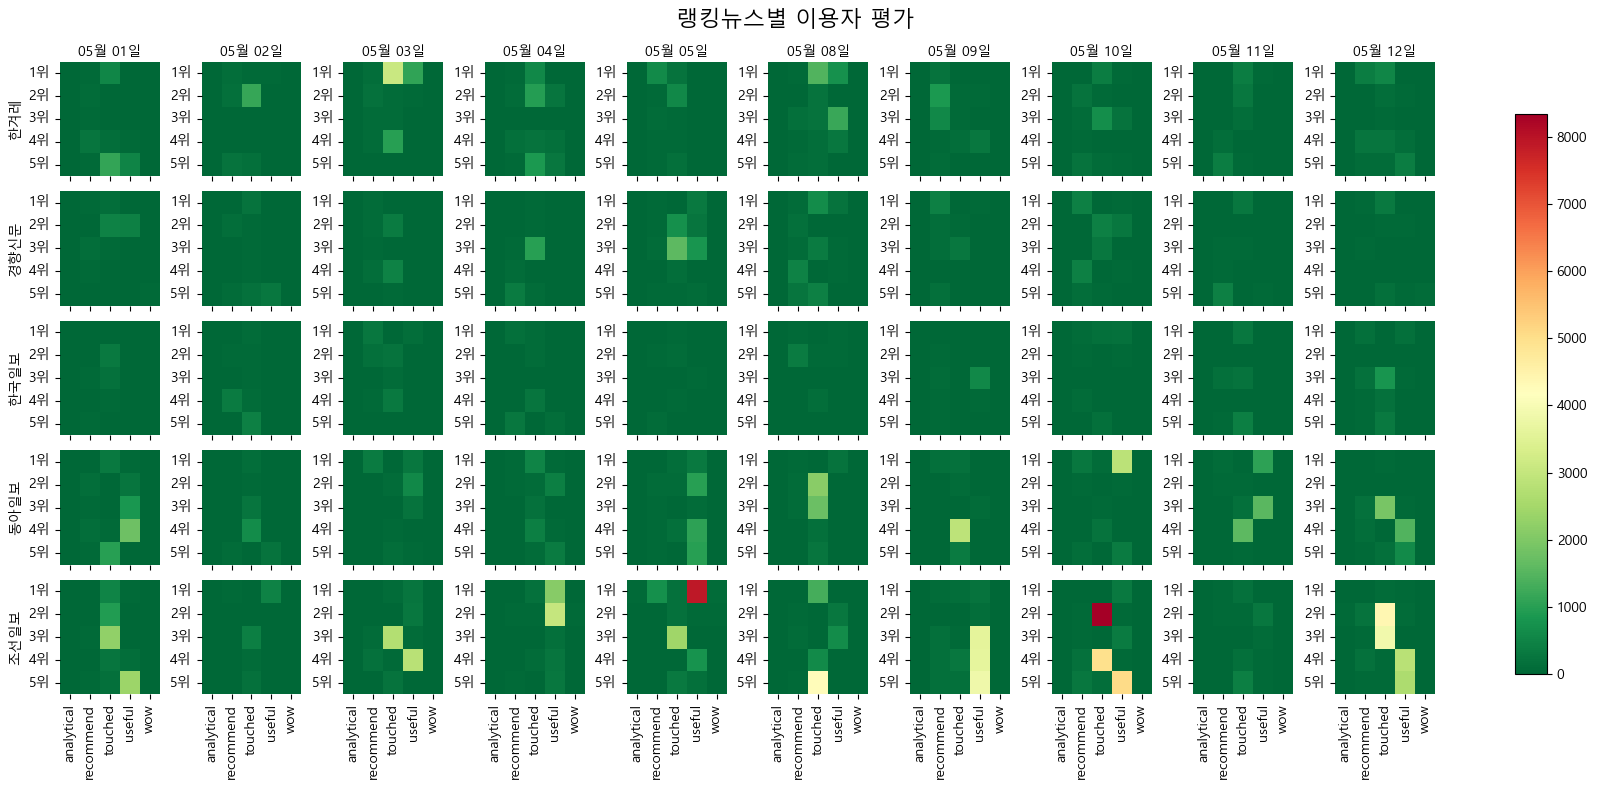

In [24]:
news = pd.read_csv("news.csv", dtype={'date': str, 'press_id': str, 'article_id': str})
wanted = news[news['type'] == 'ranking'][['date', 'press_id', 'useful', 'wow', 'touched', 'analytical', 'recommend', 'ranking']]
wanted = wanted.melt(id_vars=['date', 'press_id', 'ranking'],
                     value_vars=['useful', 'wow', 'touched', 'analytical', 'recommend'],
                     var_name='category',
                     value_name='category_value')

press = {"한겨레": "028", '경향신문': '032', '한국일보': '469', '동아일보': '020', '조선일보': '023'} 
days = wanted['date'].unique()
ranking_labels = ['1위', '2위', '3위', '4위', '5위']

num_rows = len(press.keys())
num_cols = len(days)

overall_min = wanted['category_value'].min()
overall_max = wanted['category_value'].max()

fig, axs = plt.subplots(figsize=(16, 8), nrows=num_rows, ncols=num_cols, sharex=True)

for i, (press_name, press_id) in enumerate(press.items()):
    data_press = wanted[wanted['press_id'] == press_id]   
    
    for j, day in enumerate(days):
        data_day = data_press[data_press['date'] == day]
        data_day = data_day.pivot_table(index=["press_id", 'date', "ranking"], columns="category", values="category_value")
        
        sns.heatmap(data_day, cmap='RdYlGn_r', cbar=False, ax=axs[i][j], yticklabels=ranking_labels,
                    vmin=overall_min, vmax=overall_max) 

        axs[i][j].set_ylabel("")
        axs[i][j].set_xlabel("")
        
        if i == 0:
            axs[i][j].xaxis.set_label_position('top')
            axs[i][j].set_xlabel(f"{day[4:6]}월 {day[6:]}일")
        if j == 0:
            axs[i][j].set_ylabel(press_name)
            
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=overall_min, vmax=overall_max))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)

fig.suptitle("랭킹뉴스별 이용자 평가", fontsize=16)
plt.tight_layout()
fig.subplots_adjust(right=0.9)
plt.show()

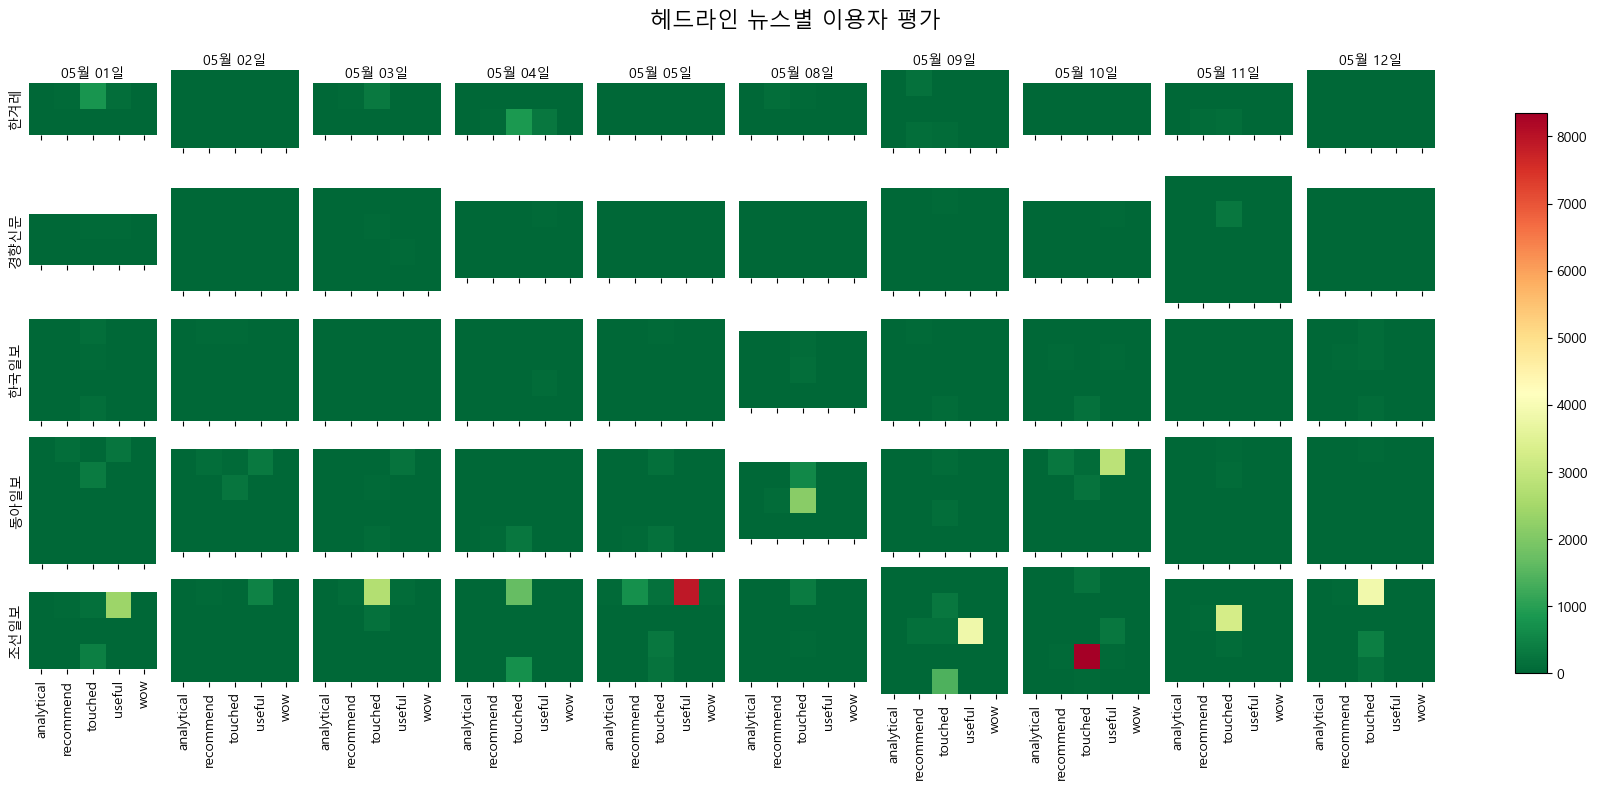

In [25]:
news = pd.read_csv("news.csv", dtype={'date': str, 'press_id': str, 'article_id': str})
wanted = news[news['type'] == 'headline'][['date', 'press_id', 'useful', 'wow', 'touched', 'analytical', 'recommend']]

press_ids = wanted['press_id'].unique()
days = wanted['date'].unique()
evals = ['useful', 'wow', 'touched', 'analytical', 'recommend']
missing_values = []

for press in press_ids:
    for day in days:
        condition = (wanted['date'] == day) & (wanted['press_id'] == press)
        row = wanted[condition]
        row_count = row.shape[0]
        if row_count < 5:
            missing_values.extend([{'date': day, 'press_id': press, 'useful': np.nan, 'wow': np.nan, 'touched': np.nan, 'analytical': np.nan, 'recommend': np.nan}] * (5 - row_count))

missing_df = pd.DataFrame(missing_values)

wanted = pd.concat([wanted, missing_df], ignore_index=True)
wanted = wanted.sort_values(by=['date', 'press_id'])
wanted['rank'] = wanted.groupby(['date', 'press_id']).cumcount() + 1
wanted = wanted.melt(id_vars=['date', 'press_id', 'rank'],
                     value_vars=['useful', 'wow', 'touched', 'analytical', 'recommend'],
                     var_name='category',
                     value_name='category_value')


press = {"한겨레": "028", '경향신문': '032', '한국일보': '469', '동아일보': '020', '조선일보': '023'} 
days = wanted['date'].unique()

num_rows = len(press.keys())
num_cols = len(days)

overall_max = wanted['category_value'].max()
overall_min = wanted['category_value'].min()

fig, axs = plt.subplots(figsize=(16, 8), nrows=num_rows, ncols=num_cols, sharex=True)

for i, (press_name, press_id) in enumerate(press.items()):
    data_press = wanted[wanted['press_id'] == press_id]

    for j, day in enumerate(days):
        data_day = data_press[data_press['date'] == day]
        data_day = data_day.pivot_table(index=["press_id", 'date', 'rank'], columns="category", values="category_value")

        mask = data_day.isna()

        sns.heatmap(data_day, cmap='RdYlGn_r', cbar=False, ax=axs[i][j], vmin=overall_min, vmax=overall_max, yticklabels=False, mask=mask)
        axs[i][j].imshow(mask, cmap='RdYlGn_r', alpha=0, extent=axs[i][j].get_xlim() + axs[i][j].get_ylim())

        axs[i][j].set_ylabel("")
        axs[i][j].set_xlabel("")

        if i == 0:
            axs[i][j].xaxis.set_label_position('top')
            axs[i][j].set_xlabel(f"{day[4:6]}월 {day[6:]}일")
        if j == 0:
            axs[i][j].set_ylabel(press_name)

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=plt.Normalize(vmin=overall_min, vmax=overall_max))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)

fig.suptitle("헤드라인 뉴스별 이용자 평가", fontsize=16)
plt.tight_layout()
fig.subplots_adjust(right=0.9)
plt.show()

In [26]:
news.loc[news['email'].notna(), 'email'] = news[news['email'].notna()]['email'].apply(ast.literal_eval)
news_normalized = pd.json_normalize(news.to_dict(orient='records'), 'email',
                                   meta=['date', 'title', 'category', 'useful', 'wow', 'touched', 'analytical',
                                         'recommend', 'press_id', 'article_id', 'type', 'ranking'])
news_normalized.rename(columns={0: 'email'}, inplace=True)

In [27]:
news_normalized.head(3)

,email,date,title,category,useful,wow,touched,analytical,recommend,press_id,article_id,type,ranking
0,jeongin@kyunghyang.com,20230501,‘미국에 올인’ 후폭풍이 몰려온다,['정치'],43,0,50,0,30,032,0003220611,headline,NaN
1,songyi@kyunghyang.com,20230501,상처 입은 이들의 ‘아주 각별한 반상회’,['사회'],0,0,0,0,0,032,0003220682,headline,NaN
2,dodo@donga.com,20230501,"[단독]“주가조작일당, 투자자 몰래 계좌 만들어 멋대로 매매”… 피해 키워",['사회'],237,15,18,3,110,020,0003494666,headline,NaN


In [28]:
headline_journalist = news_normalized[news_normalized['type'] == 'headline'].groupby(['email', 'press_id']).size().reset_index()
headline_journalist.rename(columns={0: 'headline'}, inplace=True)
ranking_journalist = news_normalized[news_normalized['type'] == 'ranking'].groupby(['email', 'press_id']).size().reset_index()
ranking_journalist.rename(columns={0: 'ranking'}, inplace=True)
type_size = pd.merge(headline_journalist, ranking_journalist, how='outer', on=['email', 'press_id'])
type_size.head(3)

,email,press_id,headline,ranking
0,01052803806@chosun.com,023,1.0,NaN
1,1am@donga.com,020,1.0,NaN
2,230@chosun.com,023,4.0,3.0


In [29]:
merged = pd.merge(type_size, journalist, how='right', on='email')
merged.drop(columns='press_id_y', inplace=True)
merged.rename(columns={"press_id_x": "press_id"}, inplace=True)
merged.head()

,email,press_id,headline,ranking,name,subscribers,cheers
0,jeongin@kyunghyang.com,032,4.0,1.0,유정인,NaN,NaN
1,songyi@kyunghyang.com,032,1.0,NaN,김송이,992,533
2,dodo@donga.com,020,2.0,1.0,김도형,1670,2067
3,suwoong2@donga.com,020,2.0,1.0,이승우,917,1309
4,cms@donga.com,020,2.0,1.0,최미송,1434,537


In [30]:
duplicates = merged[merged.duplicated(['email', 'name'], keep=False)]
merged_no_duplicates = duplicates.sort_values(['email', 'name', 'subscribers', 'cheers']).dropna().drop_duplicates(subset=['email', 'name'], keep='last')
result = pd.concat([merged_no_duplicates, merged[~merged.duplicated(['email', 'name'], keep=False)]])
result['subscribers'] = result['subscribers'].fillna(0).astype(int)
result['cheers'] = result['cheers'].fillna(0).astype(int)

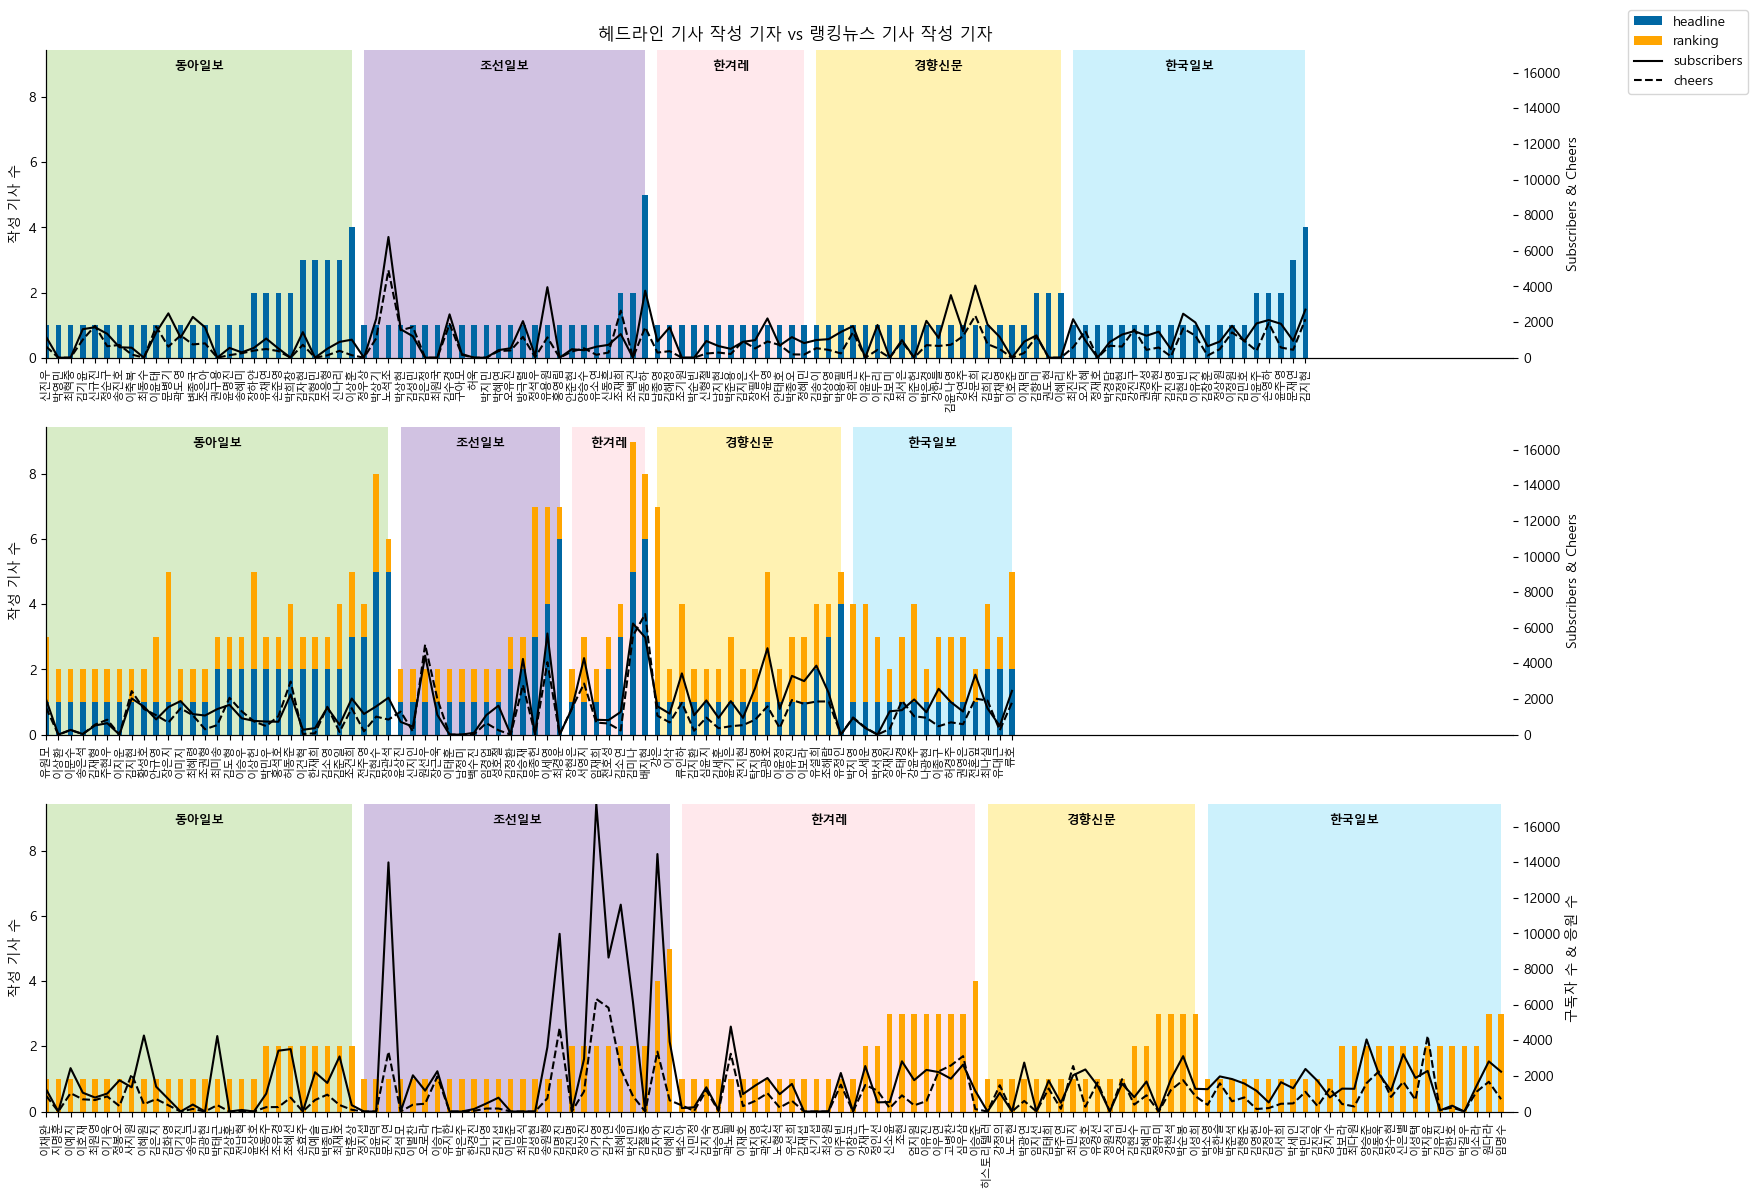

In [42]:
fig, axs = plt.subplots(3, 1, figsize=(16, 12), sharey=True)

data1 = result[(result['headline'].notna()) & (result['ranking'].isna())]
data2 = result[(result['headline'].notna()) & (result['ranking'].notna())].sort_values(['press_id', 'headline'])
data3 = result[(result['headline'].isna()) & (result['ranking'].notna())]


data1 = data1.fillna(0).sort_values(['press_id', 'headline'])
data1 = data1.reset_index(drop=True)
x_values = range(len(data1['name']))
axs[0].bar(x_values, data1['headline'], color='#0067A3', width=0.45)
axs[0].set_xticks(x_values)
axs[0].set_xticklabels(data1['name'], rotation=90, fontsize=8)
axs[0].set_xlim(0, len(data3))
twin_axs = axs[0].twinx()
twin_axs.plot(x_values, data1['subscribers'], color='black', linestyle='-', label='subscribers')
twin_axs.plot(x_values, data1['cheers'], color='black', linestyle='--', label='cheers')
twin_axs.set_ylabel('Subscribers & Cheers')
twin_axs.tick_params('y', colors='black')
twin_axs.set_ylim(bottom=0, top=result['subscribers'].max())


data2 = data2.reset_index(drop=True)
x_values = range(len(data2['name']))
axs[1].bar(x_values, data2['headline'], color='#0067A3', width=0.45, label='headline')
axs[1].bar(x_values, data2['ranking'], color='#FFA500', width=0.45, label='ranking', bottom=data2['headline'])
axs[1].set_xticks(x_values)
axs[1].set_xticklabels(data2['name'], rotation=90, fontsize=8)
axs[1].set_xlim(0, len(data3))
twin_axs = axs[1].twinx()
twin_axs.plot(x_values, data2['subscribers'], color='black', linestyle='-')
twin_axs.plot(x_values, data2['cheers'], color='black', linestyle='--')
twin_axs.set_ylabel('Subscribers & Cheers')
twin_axs.tick_params('y', colors='black')
twin_axs.set_ylim(bottom=0, top=result['subscribers'].max())


data3 = data3.fillna(0).sort_values(['press_id', 'ranking'])
data3 = data3.reset_index(drop=True)
x_values = range(len(data3['name']))
axs[2].bar(x_values, data3['ranking'], color='#FFA500', width=0.45)
axs[2].set_xticks(x_values)
axs[2].set_xticklabels(data3['name'], rotation=90, fontsize=8)
axs[2].set_xlim(0, len(data3))
twin_axs = axs[2].twinx()
twin_axs.plot(x_values, data3['subscribers'], color='black', linestyle='-')
twin_axs.plot(x_values, data3['cheers'], color='black', linestyle='--')
twin_axs.set_ylabel('구독자 수 & 응원 수')
twin_axs.tick_params('y', colors='black')
twin_axs.set_ylim(bottom=0, top=result['subscribers'].max())

colors = {'한겨레': '#FFB6C1', '경향신문': '#FFD700', '한국일보': '#58D3F7', '동아일보': '#81C147', '조선일보': '#6937a1'}
press = {"한겨레": "028", '경향신문': '032', '한국일보': '469', '동아일보': '020', '조선일보': '023'} 

datas = [data1, data2, data3]
for i, data in enumerate(datas): 
    for press_name, press_id in press.items():
        axs[i].axvspan(min(data[data['press_id']==press_id].index), max(data[data['press_id']==press_id].index), facecolor=colors[press_name], 
                       alpha=0.3, zorder=0)
        axs[i].text((min(data[data['press_id']==press_id].index) + max(data[data['press_id']==press_id].index)) / 2,
                    axs[i].get_ylim()[1]- 0.5, press_name, ha='center', va='center', color='black', fontsize=9, fontweight='bold', rotation=0)
        axs[i].set_ylabel('작성 기사 수')
        
fig.suptitle('헤드라인 기사 작성 기자 vs 랭킹뉴스 기사 작성 기자')
fig.legend(loc='upper right', bbox_to_anchor= (1.1, 1))
plt.tight_layout()
sns.despine()
plt.show()
